In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from sklearn.metrics import r2_score, confusion_matrix, classification_report, mean_squared_error
from scipy.stats import spearmanr
%matplotlib inline

       true_rho  pred_rho
0      0.036677  0.015442
1      0.007655  0.000349
2      0.020875  0.010817
3      0.003280  0.003132
4      0.002909  0.001163
...         ...       ...
10255  0.088034  0.036346
10256  0.000164  0.000352
10257  0.000920  0.000526
10258  0.001740  0.000455
10259  0.005322  0.004803

[10260 rows x 2 columns]


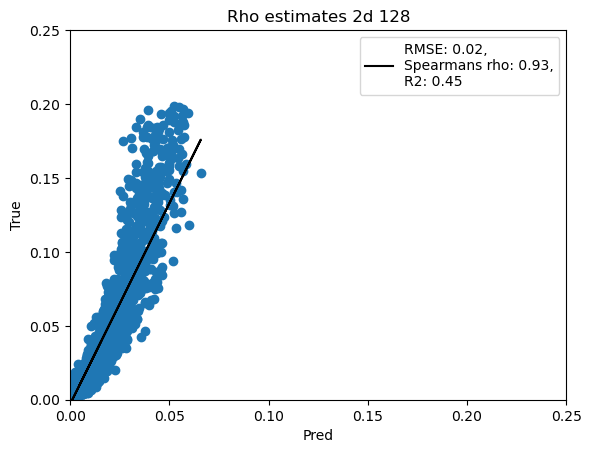

       true_rho  pred_rho
0      0.036677  0.013586
1      0.007655  0.001096
2      0.020875  0.010086
3      0.003280  0.003770
4      0.002909  0.002281
...         ...       ...
10255  0.088034  0.039787
10256  0.000164  0.000558
10257  0.000920  0.001338
10258  0.001740  0.000769
10259  0.005322  0.004105

[10260 rows x 2 columns]


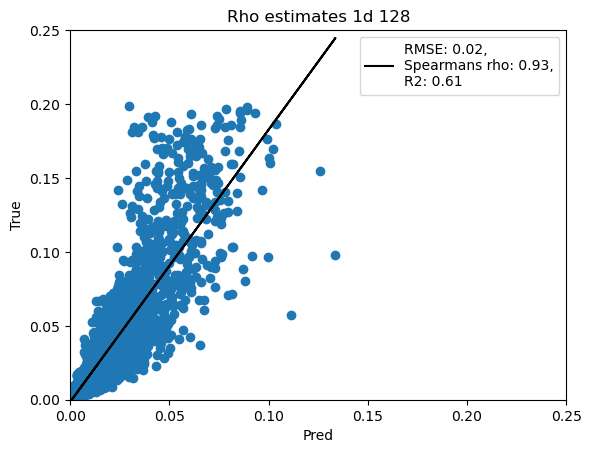

       true_rho  pred_rho
0      0.001726  0.000329
1      0.002363  0.000394
2      0.010263  0.000392
3      0.003153  0.000286
4      0.003193  0.000319
...         ...       ...
10039  0.005953  0.000337
10040  0.000229  0.000309
10041  0.000698  0.000371
10042  0.000232  0.000304
10043  0.001901  0.000307

[10044 rows x 2 columns]


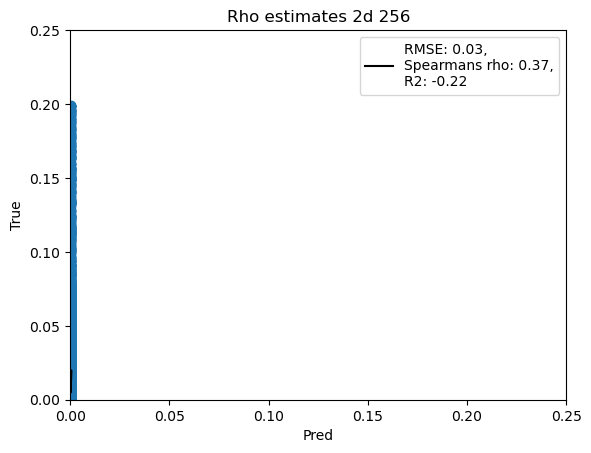

       true_rho  pred_rho
0      0.001726  0.000243
1      0.002363  0.000625
2      0.010263  0.000717
3      0.003153  0.000231
4      0.003193  0.000286
...         ...       ...
10039  0.005953  0.000334
10040  0.000229  0.000266
10041  0.000698  0.000377
10042  0.000232  0.000255
10043  0.001901  0.000247

[10044 rows x 2 columns]


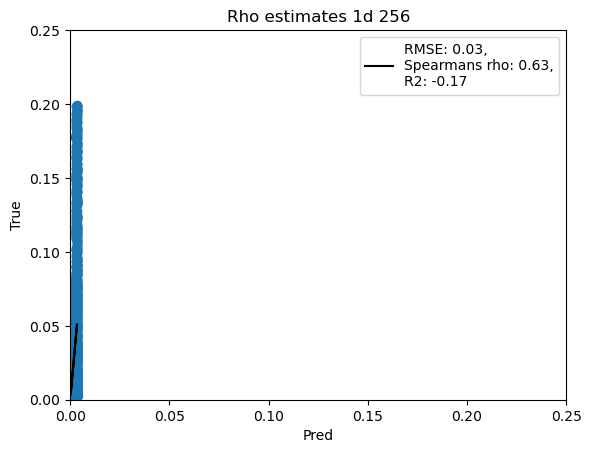

In [20]:
for pad in [128, 256]:
    for i in ["2d", "1d"]:
        rho = pd.read_csv(f"rho/n{pad}_cosine_{i}_log/n{pad}_cosine_{i}_log_preds.csv")
        rho = np.exp(rho) / 20000 
        print(rho)
        plt.plot(rho["pred_rho"], rho["true_rho"], "o")
        m, b = np.polyfit(rho["pred_rho"], rho["true_rho"], 1)
        rmse = mean_squared_error(rho["true_rho"], rho["pred_rho"], squared=False)
        plt.plot(rho["pred_rho"], m*rho["pred_rho"]+b, color="black", label=f'''RMSE: {rmse:.2f},\nSpearmans rho: {spearmanr(rho["true_rho"], rho["pred_rho"])[0]:.2f},\nR2: {r2_score(rho["true_rho"], rho["pred_rho"]):.2f}''')
        plt.legend()
        plt.xlabel("Pred")
        plt.ylabel("True")
        plt.xlim(0, 0.25)
        plt.ylim(0, 0.25)
        plt.title(f"Rho estimates {i} {pad}")
        plt.savefig(f"rho/{i}_{pad}_rho_preds.png")
        plt.show()


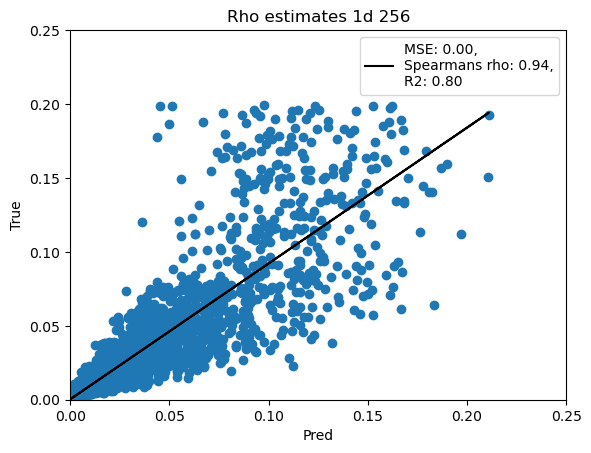

In [19]:
rho = pd.read_csv(f"rho/n256_cosine_1d_log/ones_n256_cosine_1d_log_preds.csv")
rho = rho / 10 
plt.plot(rho["pred_rho"], rho["true_rho"], "o")
m, b = np.polyfit(rho["pred_rho"], rho["true_rho"], 1)
rmse = mean_squared_error(rho["true_rho"], rho["pred_rho"])
plt.plot(rho["pred_rho"], m*rho["pred_rho"]+b, color="black", label=f'''RMSE: {mse:.2f},\nSpearmans rho: {spearmanr(rho["true_rho"], rho["pred_rho"])[0]:.2f},\nR2: {r2_score(rho["true_rho"], rho["pred_rho"]):.2f}''')
plt.legend()
plt.xlabel("Pred")
plt.ylabel("True")
plt.xlim(0, 0.25)
plt.ylim(0, 0.25)
plt.title(f"Rho estimates {i} {pad}")
plt.savefig(f"rho/{i}_{pad}_rho_preds.png")
plt.show()